<a href="https://colab.research.google.com/github/R1N-NY44/AKA/blob/main/Flip_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Performa Pendekatan Rekursif vs Iteratif pada Horizontal Image Flipping

**Note: Teks yang udah ada gambarnya gausah diotak-atik lagi :D**


Contoh Gambar bisa ambil sini:
https://drive.google.com/drive/folders/1tpZc44HsvXNyKCNCGPozxHc_OXzmndF_?usp=sharing

## Objektif

1. Horizontal Image Flipping
2. Analisis runtime

## Akses Tensor RGB

 Tentang tensor image:
- tensor per channel tuh representasi dari intensitas cahaya si warna itu. Misal: Di tensor red ada nilai 0, brarti warna merah tuh gak muncul (gelap kalo di visualnya). Kalau nilai 255 berarti merahnya maksimal (terang kalo di visualnya)
- Interval nilainya tuh cuma 0-255

In [ ]:
# Note: Ini juga gausah diotak-atik, terus pake library ini aja cukup lah ya. Goodluck ;D
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
def ambil_tensor(path_img):

  img = Image.open(path_img)
  width, height = img.size

  tensor = np.array(img)

  red = tensor[:,:,0]
  green = tensor[:,:,1]
  blue = tensor[:,:,2]

  return {
      "ukuran_img": (width, height),
      "tensor": tensor.shape,
      "red": red,
      "green": green,
      "blue": blue
  }

def tampilin_gambar(rgb_dict):
    red = rgb_dict["red"]
    green = rgb_dict["green"]
    blue = rgb_dict["blue"]

    rgb_img = np.stack((red, green, blue), axis=2)

    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    axs[0].imshow(red, cmap="gray")
    axs[0].set_title("Channel merah")
    axs[0].axis("off")

    axs[1].imshow(green, cmap="gray")
    axs[1].set_title("Channel ijo")
    axs[1].axis("off")

    axs[2].imshow(blue, cmap="gray")
    axs[2].set_title("Channel biru")
    axs[2].axis("off")

    axs[3].imshow(rgb_img)
    axs[3].set_title("Gabungan RGB")
    axs[3].axis("off")

    plt.show()

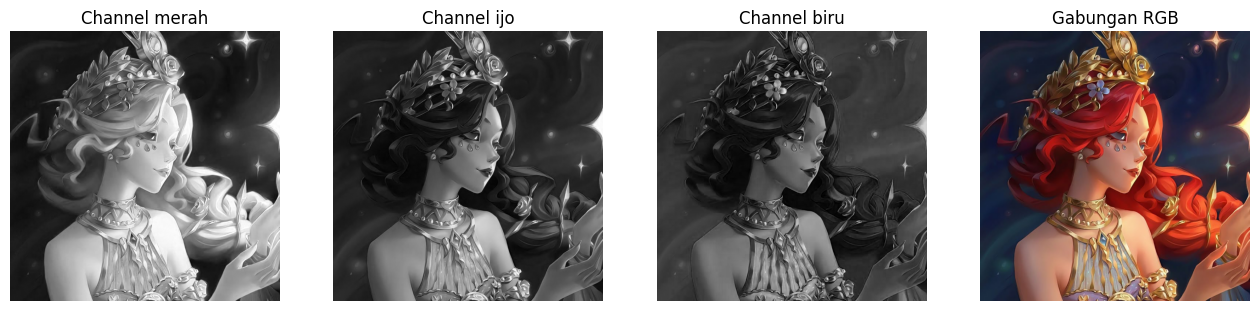

Ukuran Gambar:  (736, 736)
Ukuran Tensor:  (736, 736, 3)

 Tensor Red: 
 [[21 21 21 ... 32 32 32]
 [21 21 21 ... 32 32 32]
 [21 21 21 ... 33 32 32]
 ...
 [26 26 26 ... 39 42 45]
 [26 26 26 ... 40 41 43]
 [26 26 26 ... 43 41 41]]

 Tensor Green: 
 [[27 27 27 ... 44 44 44]
 [27 27 27 ... 44 44 44]
 [27 27 27 ... 44 44 44]
 ...
 [43 43 43 ... 48 48 51]
 [43 43 43 ... 49 47 49]
 [43 43 43 ... 52 47 47]]

 Tensor Blue: 
 [[43 43 43 ... 66 66 66]
 [43 43 43 ... 66 66 66]
 [43 43 43 ... 66 66 66]
 ...
 [63 63 63 ... 77 80 83]
 [63 63 63 ... 78 79 81]
 [63 63 63 ... 81 79 79]]


In [ ]:
# Cara pake

naiad = ambil_tensor("/content/naiad.jpg")
tampilin_gambar(naiad)
print("Ukuran Gambar: ", naiad["ukuran_img"])
print("Ukuran Tensor: ", naiad["tensor"])

print("\n Tensor Red: \n", naiad["red"])
print("\n Tensor Green: \n", naiad["green"])
print("\n Tensor Blue: \n", naiad["blue"])

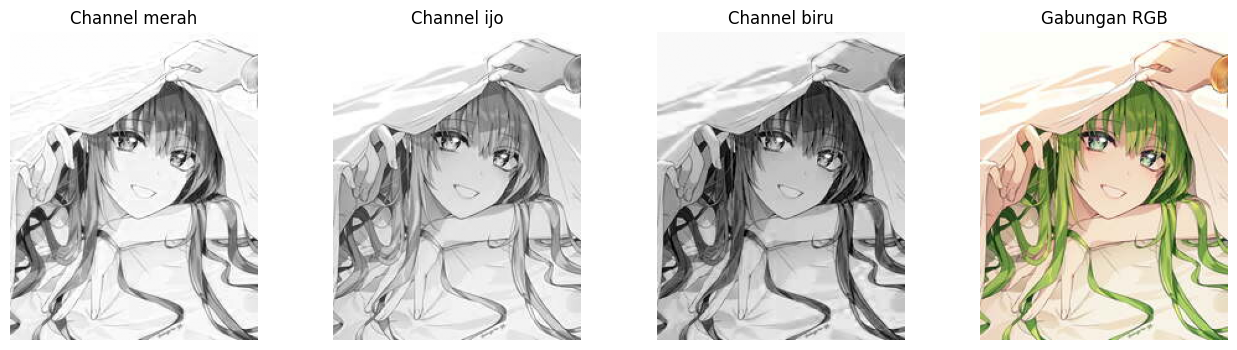

Ukuran Gambar:  (200, 249)
Ukuran Tensor:  (249, 200, 3)

 Tensor Red: 
 [[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [255 236 226 ... 148 187 215]
 [238 248 245 ...  68  95 134]
 [233 233 234 ...  79  71  57]]

 Tensor Green: 
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [238 207 197 ... 163 197 220]
 [201 211 211 ...  91 111 145]
 [211 211 212 ... 126 121 107]]

 Tensor Blue: 
 [[249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 ...
 [222 191 181 ... 120 162 188]
 [192 202 199 ...  47  75 113]
 [187 187 188 ...  56  52  38]]


In [ ]:
fgo = ambil_tensor("/content/fgo2.jpg")
tampilin_gambar(fgo)
print("Ukuran Gambar: ", fgo["ukuran_img"])
print("Ukuran Tensor: ", fgo["tensor"])

print("\n Tensor Red: \n", fgo["red"])
print("\n Tensor Green: \n", fgo["green"])
print("\n Tensor Blue: \n", fgo["blue"])

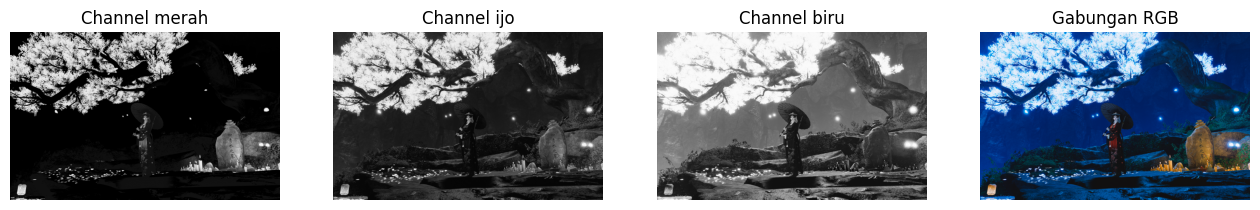

Ukuran Gambar:  (2560, 1600)
Ukuran Tensor:  (1600, 2560, 3)

 Tensor Red: 
 [[  0   0   0 ...   2   2   2]
 [  0   0   0 ...   2   2   2]
 [  0   0   0 ...   2   2   2]
 ...
 [  0   0   0 ...   0   0   0]
 [ 23  20  23 ...   0   0   0]
 [208 210 207 ...   0   0   0]]

 Tensor Green: 
 [[ 51  51  51 ...  36  38  33]
 [ 53  52  50 ...  35  34  34]
 [ 49  47  48 ...  35  34  35]
 ...
 [ 72  75  75 ...  47  46  47]
 [ 95  88  90 ...  44  44  42]
 [221 223 220 ...  43  42  44]]

 Tensor Blue: 
 [[138 139 139 ...  87  92  85]
 [140 138 139 ...  87  86  86]
 [136 134 133 ...  88  89  86]
 ...
 [156 160 158 ...  86  86  86]
 [171 166 166 ...  82  82  81]
 [240 241 239 ...  82  83  85]]


In [ ]:
lunar = ambil_tensor("/content/grave-of-the-lunar-goddess.png")
tampilin_gambar(lunar)
print("Ukuran Gambar: ", lunar["ukuran_img"])
print("Ukuran Tensor: ", lunar["tensor"])

print("\n Tensor Red: \n", lunar["red"])
print("\n Tensor Green: \n", lunar["green"])
print("\n Tensor Blue: \n", lunar["blue"])

# Iteratif

Alur iteratifnya seperti ini:


1.   Akses tensornya
2.   Pisah per channel RGB
3.   Loop di tensor salah satu channel, swap elemen paling kiri sama paling kanan per baris sampai tengah
4.   Kalau udah 1 channel lanjut ke channel setelahnya (Kalau red udah brarti ke green dan seterusnya sampe udah flip tensor channel RGBnya)
5.   Kalau udah digabungin lagi

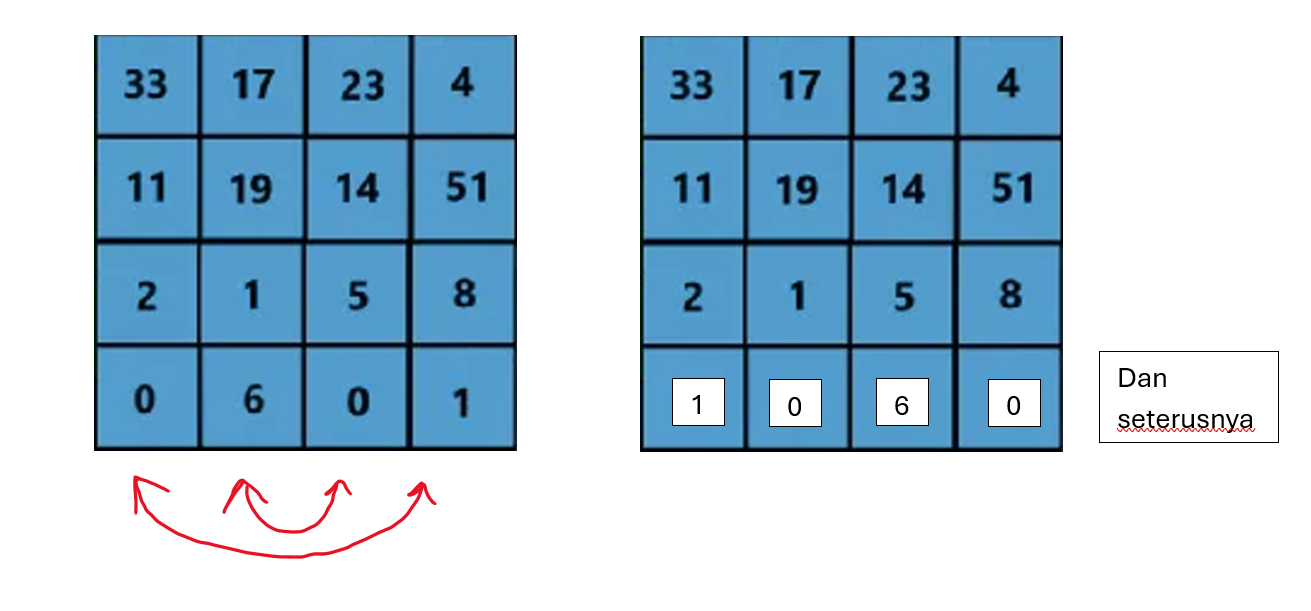

In [ ]:
# Kode nya ditaruh disini
# Library udah ditaruh dibagian akses tensor

# Rekursif

1.   Akses tensornya
2.   Pisah per channel RGB
3.   Loop di tensor salah satu channel, swap elemen paling kiri sama paling kanan per baris sampai tengah
4.   Kalau udah 1 channel lanjut ke channel setelahnya (Kalau red udah brarti ke green dan seterusnya sampe udah flip tensor channel RGBnya)
5.   Kalau udah digabungin lagi

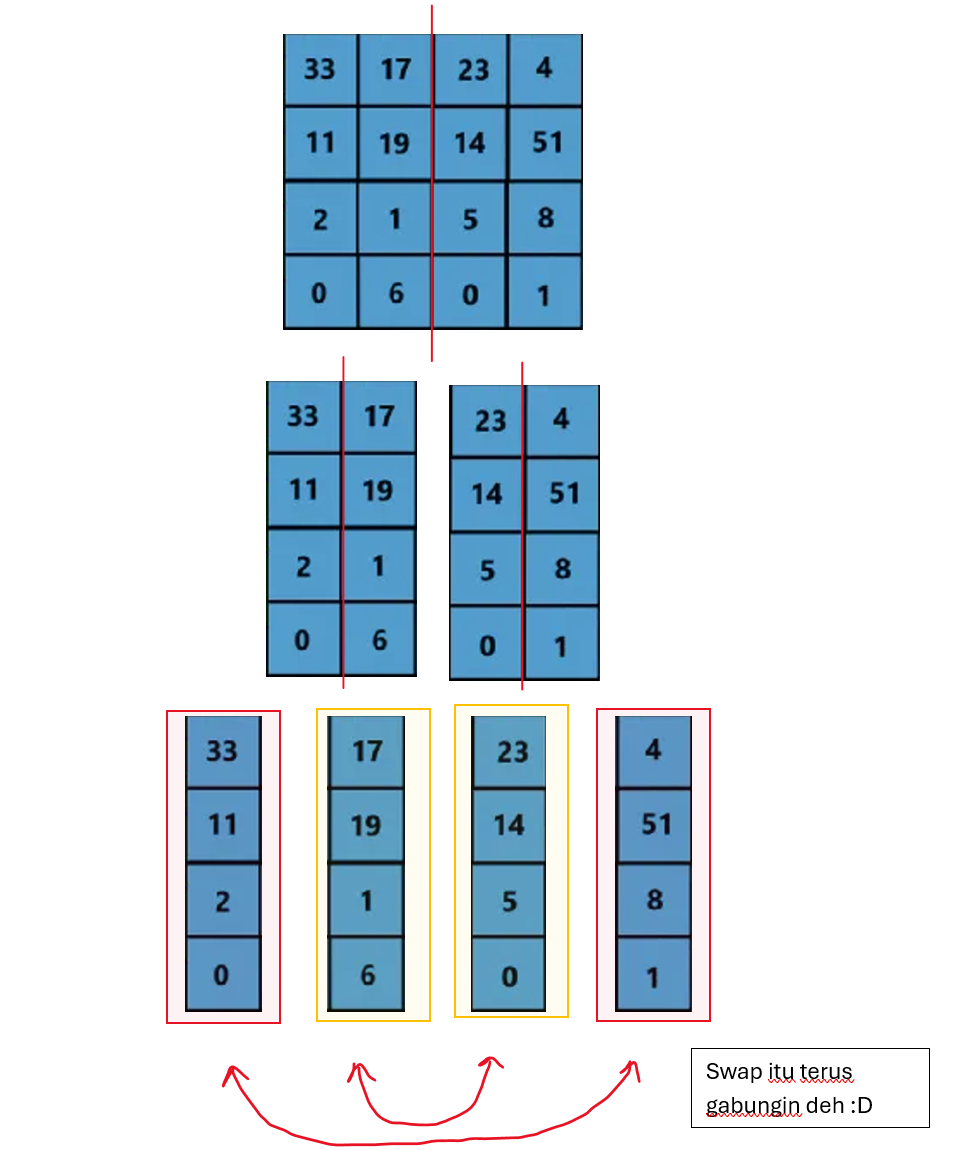

In [ ]:
# Kode nya ditaruh disini
# Library udah ditaruh dibagian akses tensor